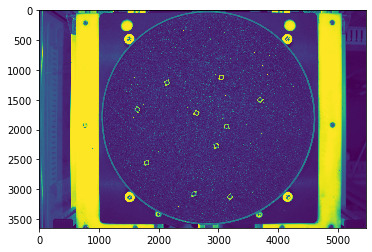

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time

filename = '40000.JPG'
# Load an color image in grayscale
img = cv2.imread('40000.JPG', 1)
# img2 = img[:,:,::-1]
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(im_rgb)

In [1]:
import ctypes
from time import process_time 
# Load DLL into memory.

hllDll = ctypes.WinDLL("Detect.dll")

t1_start = process_time()
# result1= hllDll.Detect()
print(hllDll.Detect("input_image.jpg", 230, 1085, 50, 4595, 3565, 1000, 20000, 20))
t1_stop = process_time()
print(t1_stop - t1_start)
# print(result1)

-1
0.0


In [4]:
from ctypes import *
libc = CDLL("Detect.dll")
# c_s = c_char_p()
print(libc.Detect("input_image.jpg", 230, 1085, 50, 4595, 3565, 500, 15000, 4))

217888816


In [3]:
s = "Hello, World"
c_s = c_char_p(s)
print(c_s)

TypeError: bytes or integer address expected instead of str instance

In [ ]:
import ctypes
dll = ctypes.CDLL('Detect.dll')
Open = dll.Detect
Open.argtypes = [ctypes.POINTER(ctypes.c_void_p),ctypes.c_char_p]
Open.restype = ctypes.c_uint16
Handle = ctypes.c_void_p()
result = Open(ctypes.byref(Handle),'c:\\Config.xml')

In [ ]:
string test;
while (char*!=null){
    test += char*;
    char++;
}

In [81]:
y=50 3565    x1 = 1085 4595   x2=4630  y2=3595  

'3768,2944;1817,2867;2820,1858;3693,1055;1721,932'

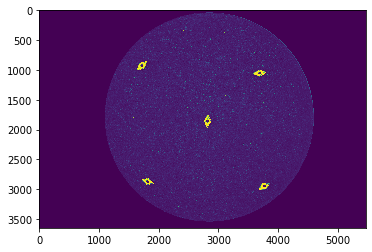

In [119]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time

def is_contour_good(c, min_area, max_area):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    # the contour is 'bad' if it is not a rectangle
    return (area >= min_area) and (area <= max_area)

def detect_objects(img_filename, binary_threshold, top_leftx, top_lefty, bottom_rightx, bottom_righty, min_area, max_area, num_objects):
    ipImg = cv2.imread(img_filename, 0)
#     ipImg = cv2.blur(ipImg, (5,5))
    height,width = ipImg.shape
    circleMask = np.zeros((height,width), np.uint8)
    circle_radius = round((bottom_righty - top_lefty)/2)
    center_circle = (round(top_leftx+circle_radius), round(top_lefty+circle_radius))
    cv2.circle(circleMask, center_circle, circle_radius, 1, thickness=-1)
    maskedImg = cv2.bitwise_and(ipImg, ipImg, mask=circleMask)
    plt.imshow(maskedImg)
    kernel = np.ones((5,5), np.uint8)
    (ret, bwImg) = cv2.threshold(maskedImg, binary_threshold, 255, cv2.THRESH_BINARY)
    erodeImg = cv2.erode(bwImg, kernel, iterations=1)
    dilateImg = cv2.dilate(erodeImg, kernel, iterations=1)
    contours, hierarchy = cv2.findContours(dilateImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objectCoordinates = list()
    count = 0
    im = cv2.cvtColor(ipImg, cv2.COLOR_GRAY2RGB)
    for c in contours:
        if is_contour_good(c, min_area, max_area) and num_objects>=count:
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.04 * peri, True)
            objectCoordinates.append([cX, cY])
            count += 1
            if len(approx) == 4 or len(approx) == 3:
                rotrect = cv2.minAreaRect(approx)
                box = cv2.boxPoints(rotrect)
                box = np.int0(box)
                cv2.drawContours(im, [box], 0, (0,255,0), 10)
                cv2.line(im, (box[0][0], box[0][1]), (box[1][0], box[1][1]), (0,0,255), 10) 
                cv2.putText(im, str(round(rotrect[2], 2)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 10)
    cv2.imwrite('tes.jpg', im)
    stringCoordinates = ';'.join(str(i[0]) + "," + str(i[1]) for i in objectCoordinates)
    return stringCoordinates

# detect_objects('Testimage.jpg', binary_threshold=230, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=10000, max_area=25000, num_objects=100)
# detect_objects('testim.jpg', binary_threshold=50, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=1000, max_area=15000, num_objects=100)
# detect_objects('input_image.jpg', binary_threshold=230, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=10000, max_area=15000, num_objects=100)
detect_objects('30.jpg', binary_threshold=80, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=10000, max_area=25000, num_objects=100)

'3358,233;1354,1036;2753,2062;4252,2673;2017,3219'

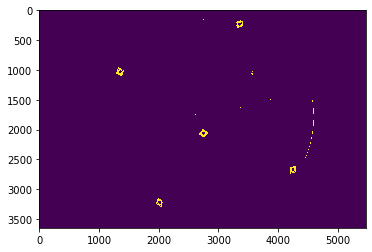

In [187]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, math

def is_contour_good(c, min_area, max_area):
    area = cv2.contourArea(c)
    # the contour is 'bad' if it is not a rectangle
    return (area >= min_area) and (area <= max_area)

def countour_angle_center(c):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) >= 3:
        degree = math.degrees(math.atan2(approx[1][0][1] - approx[0][0][1], approx[1][0][0] - approx[0][0][0]))
    else:
        degree = 0
        
    return (cX, cY, approx[0], approx[1], degree)
    

def detect_objects(img_filename, binary_threshold, top_leftx, top_lefty, bottom_rightx, bottom_righty, min_area, max_area, num_objects):
    ipImg = cv2.imread(img_filename, 0)
    height,width = ipImg.shape
    circleMask = np.zeros((height,width), np.uint8)
    circle_radius = round((bottom_righty - top_lefty)/2)
    center_circle = (round(top_leftx+circle_radius), round(top_lefty+circle_radius))
    cv2.circle(circleMask, center_circle, circle_radius, 1, thickness=-1)
    maskedImg = cv2.bitwise_and(ipImg, ipImg, mask=circleMask)
    kernel = np.ones((5,5), np.uint8)
    (ret, bwImg) = cv2.threshold(maskedImg, binary_threshold, 255, cv2.THRESH_BINARY)
    erodeImg = cv2.erode(bwImg, kernel, iterations=1)
    dilateImg = cv2.dilate(erodeImg, kernel, iterations=1)
    plt.imshow(dilateImg)
    contours, hierarchy = cv2.findContours(dilateImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours.reverse()
    count = 0
    objectCoordinates = []
    im = cv2.cvtColor(ipImg, cv2.COLOR_GRAY2RGB)
    for c in contours:
        if is_contour_good(c, min_area, max_area) and num_objects>=count:
            cX, cY, start, end, degree = countour_angle_center(c)
            objectCoordinates.append([cX, cY])
            count += 1
            cv2.line(im, (start[0][0], start[0][1]), (end[0][0], end[0][1]), (0,0,255), 15) 
            cv2.putText(im, str(round(degree, 2)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 10)
    cv2.imwrite('tes.jpg', im)
    stringCoordinates = ';'.join(str(i[0]) + "," + str(i[1]) for i in objectCoordinates)
    return stringCoordinates

detect_objects('Testimage.jpg', binary_threshold=230, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=10000, max_area=25000, num_objects=100)
# detect_objects('testim.jpg', binary_threshold=150, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=1000, max_area=15000, num_objects=100)
# detect_objects('input_image.jpg', binary_threshold=240, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=10000, max_area=15000, num_objects=100)
# detect_objects('30.jpg', binary_threshold=100, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=5000, max_area=15000, num_objects=100)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time

def is_contour_good(c, min_area, max_area):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    return (area >= min_area) and (area <= max_area)

def detect_objects(img_filename, binary_threshold, top_leftx, top_lefty, bottom_rightx, bottom_righty, min_area, max_area, num_objects):
    ipImg = cv2.imread(img_filename, 0)
    height,width = ipImg.shape
    circleMask = np.zeros((height,width), np.uint8)
    circle_radius = round((bottom_righty - top_lefty)/2)
    center_circle = (round(top_leftx+circle_radius), round(top_lefty+circle_radius))
    cv2.circle(circleMask, center_circle, circle_radius, 1, thickness=-1)
    maskedImg = cv2.bitwise_and(ipImg, ipImg, mask=circleMask)
#     plt.imshow(maskedImg)
    kernel = np.ones((5,5), np.uint8)
    (ret, bwImg) = cv2.threshold(maskedImg, binary_threshold, 255, cv2.THRESH_BINARY)
    erodeImg = cv2.erode(bwImg, kernel, iterations=1)
    dilateImg = cv2.dilate(erodeImg, kernel, iterations=1)
    contours, hierarchy = cv2.findContours(dilateImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objectCoordinates = list()
    count = 0
    boundRect = list()
    im = cv2.cvtColor(ipImg, cv2.COLOR_GRAY2RGB)
    for c in contours:
        if is_contour_good(c, min_area, max_area) and num_objects>=count:
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            test = (cv2.boundingRect(c))
            objectCoordinates.append([cX, cY])
            cv2.rectangle(im, (int(test[0]), int(test[1])), (int(test[0]+test[2]), int(test[1]+test[3])), (0,255,0), 5)
            cv2.circle(im, (cX, cY), 10, (255, 0, 0), -1)
#             cv2.drawContours(im, [c], -1, (0, 0, 255), 10)
            count += 1
    plt.imshow(im)
#     cv2.imwrite('tes.jpg', im)
    stringCoordinates = ';'.join(str(i[0]) + "," + str(i[1]) for i in objectCoordinates)
    return stringCoordinates

detect_objects('Testimage.jpg', binary_threshold=230, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=10000, max_area=35000, num_objects=4)
# detect_objects('Testimage.jpg', binary_threshold=230, top_leftx=1085, top_lefty=50, bottom_rightx=4595, bottom_righty=3565, min_area=10000, max_area=35000, num_objects=4)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time

def is_contour_good(c, min_area, max_area):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    if len(c) > 3:
        print(len(c))
#     print(area)
    # the contour is 'bad' if it is not a rectangle
    return (area >= min_area) and (area <= max_area)

def detect_objects(img_filename, binary_threshold, top_leftx, top_lefty, bottom_rightx, bottom_righty, min_area, max_area, num_objects):
    ipImg = cv2.imread(img_filename, 0)
    height,width = ipImg.shape
    circleMask = np.zeros((height,width), np.uint8)
    circle_radius = round((bottom_righty - top_lefty)/2)
    center_circle = (round(top_leftx+circle_radius), round(top_lefty+circle_radius))
    cv2.circle(circleMask, center_circle, circle_radius, 1, thickness=-1)
    maskedImg = cv2.bitwise_and(ipImg, ipImg, mask=circleMask)
    plt.imshow(maskedImg)
    kernel = np.ones((5,5), np.uint8)
    (ret, bwImg) = cv2.threshold(maskedImg, binary_threshold, 255, cv2.THRESH_BINARY)
    erodeImg = cv2.erode(bwImg, kernel, iterations=1)
    dilateImg = cv2.dilate(erodeImg, kernel, iterations=1)
    contours, hierarchy = cv2.findContours(dilateImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objectCoordinates = list()
    count = 0
    for c in contours:
        if is_contour_good(c, min_area, max_area):
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            objectCoordinates.append([cX, cY])
            count += 1
    stringCoordinates = ';'.join(str(i[0]) + "," + str(i[1]) for i in objectCoordinates)
    return stringCoordinates

detect_objects('Testimage.jpg', binary_threshold=240, top_leftx=1100, top_lefty=40, bottom_rightx=4480, bottom_righty=3540, min_area=5000, max_area=35000, num_objects=10)
# detect_objects('Testimage.jpg', binary_threshold=230, top_leftx=1085, top_lefty=50, bottom_rightx=4595, bottom_righty=3565, min_area=10000, max_area=35000, num_objects=4)

In [101]:
ll = [[22, 33], [33,55]]
print(';'.join(str(i[0]) + "," + str(i[1]) for i in ll))

22,33;33,55


IndexError: list assignment index out of range

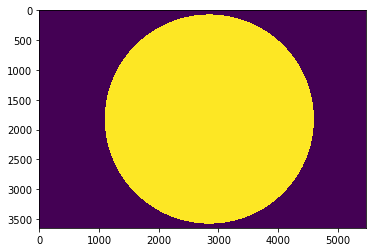

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time


def detect_objects(img_filename, binary_threshold, min_fullness, max_fullness, min_area, max_area, num_objects):
    ipImg = cv2.imread(img_filename, 0)
    height,width = ipImg.shape
    circleMask = np.zeros((height,width), np.uint8)
    center_circle = (min_fullness, round(height/2))
    circle_radius = max_fullness
    cv2.circle(circleMask, center_circle, circle_radius, 1, thickness=-1)
    plt.imshow(circleMask)
    maskedImg = cv2.bitwise_and(ipImg, ipImg, mask=circleMask)
    kernel = np.ones((5,5), np.uint8)
    (ret, bwImg) = cv2.threshold(maskedImg, binary_threshold, 255, cv2.THRESH_BINARY)
    erodeImg = cv2.erode(bwImg, kernel, iterations=1)
    dilateImg = cv2.dilate(erodeImg, kernel, iterations=1)
#     plt.imshow(bwImg)
    contours, hierarchy = cv2.findContours(dilateImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objectCoordinates = [0] * num_objects
    count = 0
    for c in contours:
        if is_contour_good(c, min_area, max_area) and num_objects>=count:
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            objectCoordinates[count] = [cX, cY]
            count += 1
    return objectCoordinates

detect_objects('input_image1.jpg', 240, 2850, 1750, 5000, 200000, 4)

In [ ]:
from time import process_time 
t1_start = process_time()  
im = cv2.imread(filename, 0)
height,width = im.shape
circle_img = np.zeros((height,width), np.uint8)
cv2.circle(circle_img, (2850,round(height/2)),1750,1,thickness=-1)
kernel = np.ones((5,5), np.uint8) 
masked_data = cv2.bitwise_and(im, im, mask=circle_img)
(thresh, im_bw) = cv2.threshold(masked_data, 200, 255, cv2.THRESH_BINARY)
img_erosion = cv2.erode(im_bw, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
# find the contours from the thresholded image
img_process = img_dilation.copy()
im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# loop over the contours
for c in contours:
    # if the contour is bad, draw it on the mask
    if is_contour_good(c):
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
#         print(cX,cY)
        cv2.drawContours(im, [c], -1, (0, 0, 255), 10)
        cv2.circle(im, (cX, cY), 10, (255, 0, 0), -1)
t1_stop = process_time() 
print(t1_stop - t1_start)
cv2.putText(im, str(t1_stop - t1_start) + 'seconds', (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), 10)
plt.imshow(im)
cv2.imwrite('tes.jpg', im)

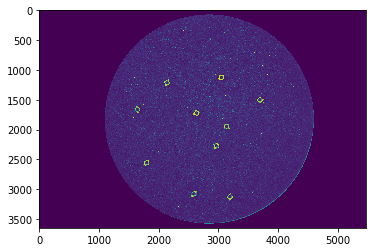

In [52]:
from time import process_time 
t1_start = process_time()  
im = cv2.imread(filename, 0)
height,width = im.shape
circle_img = np.zeros((height,width), np.uint8)
cv2.circle(circle_img, (2850,round(height/2)),1750,1,thickness=-1)
kernel = np.ones((5,5), np.uint8) 
masked_data = cv2.bitwise_and(im, im, mask=circle_img)
# (thresh, im_bw) = cv2.threshold(masked_data, 100, 255, cv2.THRESH_BINARY)

# img_erosion = cv2.erode(im_bw, kernel, iterations=1)
# img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
plt.imshow(masked_data)

0.296875


True

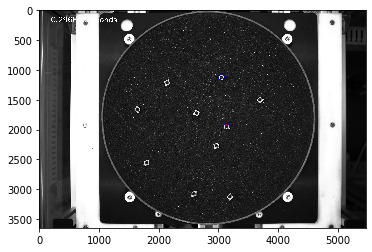

In [38]:
from time import process_time 
t1_start = process_time()  
im = cv2.imread(filename, 0)
height,width = im.shape
circle_img = np.zeros((height,width), np.uint8)
cv2.circle(circle_img, (2850,round(height/2)),1750,1,thickness=-1)
kernel = np.ones((5,5), np.uint8) 
masked_data = cv2.bitwise_and(im, im, mask=circle_img)
(thresh, im_bw) = cv2.threshold(masked_data, 200, 255, cv2.THRESH_BINARY)
img_erosion = cv2.erode(im_bw, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
# find the contours from the thresholded image
img_process = img_dilation.copy()
im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# loop over the contours
for c in contours:
    # if the contour is bad, draw it on the mask
    if is_contour_good(c):
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
#         print(cX,cY)
        cv2.drawContours(im, [c], -1, (0, 0, 255), 10)
        cv2.circle(im, (cX, cY), 10, (255, 0, 0), -1)
t1_stop = process_time() 
print(t1_stop - t1_start)
cv2.putText(im, str(t1_stop - t1_start) + 'seconds', (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), 10)
plt.imshow(im)
cv2.imwrite('tes.jpg', im)

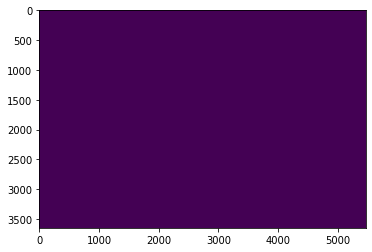

In [5]:
# find the contours from the thresholded image
img_process = img_dilation.copy()
contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(img_process, contours, -1, (255), 2)
plt.imshow(image)

In [9]:
import re

re.search('1.3', 'test1432ll')

<re.Match object; span=(4, 7), match='143'>